# Energy Consumption Forecasting model using Time series analysis:

# Import Essential Liberaries

In [73]:
import warnings
warnings.filterwarnings('ignore') #Situation where it is useful to alert the user of some condition un program.

In [1]:
import pandas as pd #for data manipulation and analysis

In [2]:
df=pd.read_csv("TotalPower.csv",parse_dates=['DeviceTimeStamp']) #read the data and custom date string defined by formate paramter
df.head() #read top 5 rows

,DeviceTimeStamp,KWH,KWH_I,KVARH,KW,KVA,KVAR,MPD,MKVAD
0,2019-06-27 10:51:00,54.501,0.0,57.731,0.0,0.0,0.0,23.6,23.6
1,2019-06-27 10:52:00,54.501,0.0,57.731,0.0,0.0,0.0,23.6,23.6
2,2019-06-27 10:53:00,54.501,0.0,57.731,0.0,0.0,0.0,23.6,23.6
3,2019-06-27 10:53:00,54.501,0.0,57.731,0.0,0.0,0.0,23.6,23.6
4,2019-06-27 10:56:00,54.501,0.0,57.731,0.0,0.0,0.0,23.6,23.6


In [3]:
df.shape #get the shape of dataset (Rows:19248, column:9)

(19248, 9)

In [4]:
from datetime import datetime #it contain datetime formate and to change it to dates only
from datetime import date

Now our 1st column 'DeviceTimeStamp' contain date only. Find out the total electricity consumption KWH month wise (Closing reading - open reading) 

In [16]:
df_new=pd.DataFrame(pd.DataFrame(df.groupby(df.DeviceTimeStamp.dt.date)["KWH"].nth(-1))["KWH"]-pd.DataFrame(df.groupby(df.DeviceTimeStamp.dt.date)["KWH"].nth(0))["KWH"])

In [17]:
df_new #Here is our new data set with date wise energy consumption. To check and analyse the pattern.

,KWH
DeviceTimeStamp,
2019-06-27,0.000
2019-06-28,0.000
2019-06-29,0.000
2019-07-01,0.219
2019-07-02,0.000
...,...
2020-04-10,1110.400
2020-04-11,1054.800
2020-04-12,877.000


# Visualiza the Energy Data 'KWH'

In [36]:
import matplotlib.pyplot as plt #make thing easier to visualiaze
%matplotlib inline
plt.style.use("dark_background")

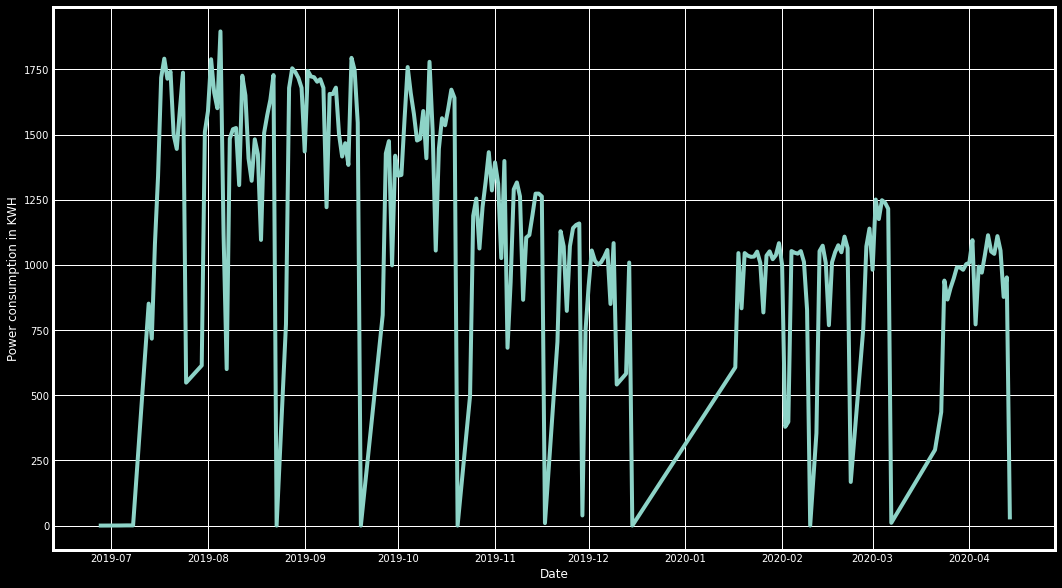

In [38]:
plt.figure(figsize=(16,10))
plt.xlabel("Date")
plt.ylabel("Power consumption in KWH")
plt.plot(df_new)

from the above energy consumption pattern we have observed Jun-2019 to Oct-2019 consumtion HIGH. NOV-2019 to Apr-2020 LOW. it may not be stationary, so next we check weather our data stationary of not. If it is not stationary then how do we make it stationanry.

In statistics, the Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

In [39]:
### Testing For Stationarity means constant variation with time

from statsmodels.tsa.stattools import adfuller #it contain function, useful for Time series analysis.

In [41]:
#Ho: It is non stationary (null hypo)
#H1: It is stationary (alternate hypo)
#Adfuller: Common statistical test for check stationary give 5 values
#zip-combining the level & result values
 
def adfuller_test():
    result=adfuller()
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):  
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [42]:
adfuller_test(df_new['KWH'])

ADF Test Statistic : -3.779235928474579
p-value : 0.003127048103914537
#Lags Used : 6
Number of Observations Used : 210
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Adfuller P-Value is lower then 5%. so reject null hypothesis. Once null hypothesis get rejected alternative hypothesis can be accepted.

#From above dicky fuller test it is clear that data is stationary

# Plot AR and MA model

ARIMA has three componet Autoregressive, Moving Average, Differencing: ARIMA(p,d,q), p=AR models lags, d-differencing, q= moving average lags.

1. Identify the AR model by using partial auto correlation (pacf) 

2. Identify the MA model by using auto correlation (acf) 


In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  #identify AR and MA orders by ACF, PACF plots. p and q values
import statsmodels.api as sm

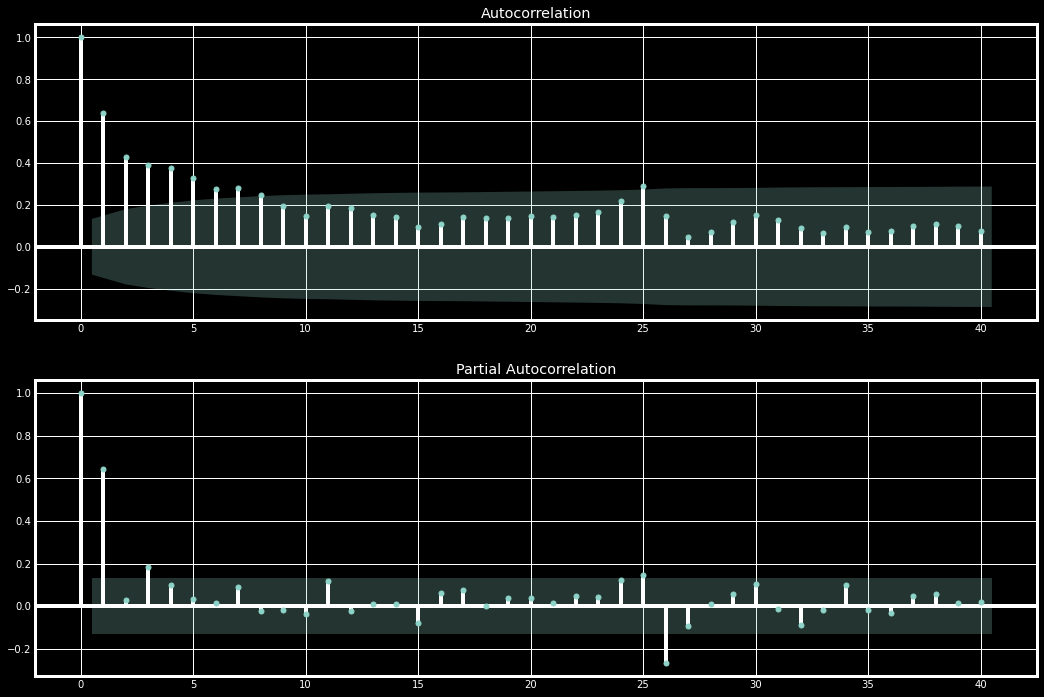

In [54]:
fig=plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_new['KWH'].iloc[:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_new['KWH'].iloc[:],lags=40,ax=ax2)

In [56]:
from pandas.plotting import autocorrelation_plot #correlation amoung the element of time series data

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

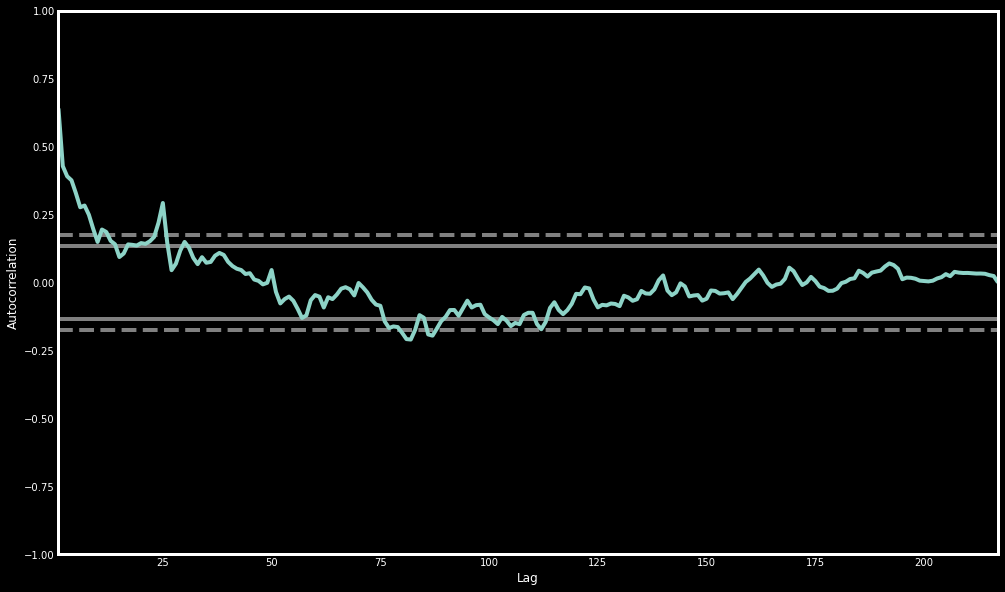

In [65]:
plt.figure(figsize=(15,10))
autocorrelation_plot(df_new["KWH"])
# plt.show()

#### from above fig it is clear that the curve after 8 coming inside the critical boundary therefore p=8
#### From below and above PACF plot it is clear that q=2

In [89]:
df_new.reset_index(inplace=True) #data has modifide inplace and return nothing and dataframe has updated.

<Figure size 1080x720 with 0 Axes>

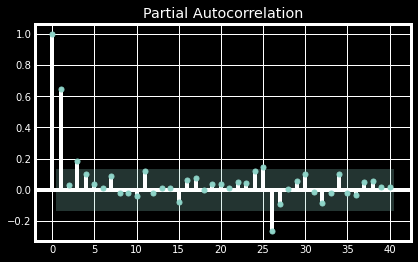

In [90]:
plt.figure(figsize=(15,10))
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_new['KWH'],lags=40)
plt.show()

Auto Regressive Integrated Moving Average model is the form of regression analysis that guages the strength of one dependent varial to other changing variable

In [91]:
from statsmodels.tsa.arima_model import ARIMA

In [92]:
mod=ARIMA(df_new['KWH'],order=(8,1,2)) #ARIMA (p,d,q), p:no of time lags(AR), d:no of times had past value subtracted, q: value come from moving Average

In [93]:
mod_fit=mod.fit()

In [94]:
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.KWH   No. Observations:                  216
Model:                 ARIMA(8, 1, 2)   Log Likelihood               -1571.612
Method:                       css-mle   S.D. of innovations            347.863
Date:                Sun, 06 Feb 2022   AIC                           3167.224
Time:                        17:28:09   BIC                           3207.727
Sample:                             1   HQIC                          3183.587
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3730      6.192      0.383      0.702      -9.763      14.509
ar.L1.D.KWH    -0.4839      0.164     -2.957      0.003      -0.805      -0.163
ar.L2.D.KWH     0.3483      0.216      1.614      0.106      -0.075       0.771
ar.L3.D.KWH    -0.0591      0.147     -0.401      0.688      -0.348       0.230
ar.L4.D.KWH     0.1111      0.142      0.782      0.434      -0.167       0.390
ar.L5.D.KWH     0.0483      0.119      0.406      0.685      -0.185       0.281
ar.L6.D.KWH    -0.0386      0.104     -0.372      0.710      -0.242       0.165
ar.L7.D.KWH     0.0347      0.104      0.332      0.740      -0.170       0.239
ar.L8.D.KWH     0.0632      0.081      0.776      0.438      -0.096       0.223
ma.L1.D.KWH     0.1210      0.149      0.811      0.417      -0.171       0.413
ma.L2.D.KWH    -0.8790      0.149     -5.911      0.000      -1.170      -0.588
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3228           -0.0000j            1.3228           -0.0000
AR.2            1.0635           -1.0825j            1.5175           -0.1264
AR.3            1.0635           +1.0825j            1.5175            0.1264
AR.4           -0.0877           -1.4101j            1.4128           -0.2599
AR.5           -0.0877           +1.4101j            1.4128            0.2599
AR.6           -1.0342           -0.0000j            1.0342           -0.5000
AR.7           -1.3943           -0.7557j            1.5859           -0.4209
AR.8           -1.3943           +0.7557j            1.5859            0.4209
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.1377           +0.0000j            1.1377            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

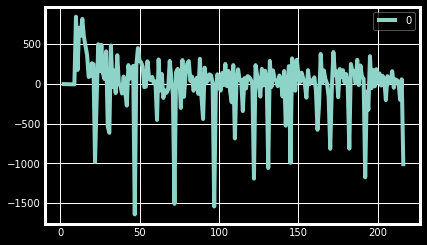

In [95]:
residuals=pd.DataFrame(mod_fit.resid) #measure how far away a point is vertically from the regressin line
residuals.plot()

<AxesSubplot:ylabel='Density'>

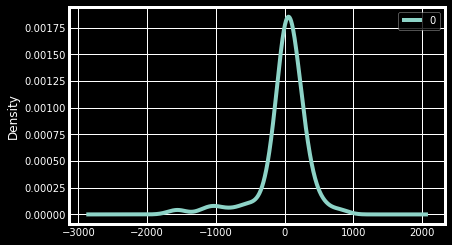

In [96]:
residuals.plot(kind='kde') #kernel density: it shows the smoothness distribution of data sets, Residual:difference between observed and predictive values

In [97]:
residuals.describe()

,0
count,216.000000
mean,4.195064
std,350.069043
min,-1642.312667
25%,-55.475394
50%,46.749514
75%,167.548332
max,843.889073


In [99]:
df_new.tail() #list bottom 5 no

,DeviceTimeStamp,KWH
212,2020-04-10,1110.4
213,2020-04-11,1054.8
214,2020-04-12,877.0
215,2020-04-13,952.1
216,2020-04-14,23.7


In [120]:
df_new_dated=df_new.set_index("DeviceTimeStamp")

In [121]:
df_new_dated

,KWH
DeviceTimeStamp,
2019-06-27,0.000
2019-06-28,0.000
2019-06-29,0.000
2019-07-01,0.219
2019-07-02,0.000
...,...
2020-04-10,1110.400
2020-04-11,1054.800
2020-04-12,877.000


In [127]:
df_new_dated.index[-1]

datetime.date(2020, 4, 14)

In [161]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_new_dated.index[-1]+ DateOffset(days=x)for x in range(0,90)]

In [227]:
op=pd.DataFrame(future_dates,columns=['Dates'])

In [228]:
op

,Dates
0,2020-04-14
1,2020-04-15
2,2020-04-16
3,2020-04-17
4,2020-04-18
...,...
85,2020-07-08
86,2020-07-09
87,2020-07-10
88,2020-07-11


In [246]:
pred_df=pd.concat([op,pd.DataFrame(results.predict(217,306)).reset_index(drop=True)],axis=1)

In [248]:
df_new.columns

Index(['DeviceTimeStamp', 'KWH'], dtype='object')

In [244]:
pd.DataFrame(results.predict(217,306)).reset_index(drop=True)

,predicted_mean
0,260.738647
1,412.440018
2,642.946127
3,718.245234
4,723.113895
...,...
85,175.997627
86,413.720237
87,530.279037
88,554.735672


In [231]:
op["Forecast_KWH"]=pd.DataFrame(results.predict(217,307))

In [232]:
op

,Dates,Forecast_KWH
0,2020-04-14,NaN
1,2020-04-15,NaN
2,2020-04-16,NaN
3,2020-04-17,NaN
4,2020-04-18,NaN
...,...,...
85,2020-07-08,NaN
86,2020-07-09,NaN
87,2020-07-10,NaN
88,2020-07-11,NaN


In [163]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_new_dated.columns)

In [164]:
future_datest_df

,KWH
2020-04-15,NaN
2020-04-16,NaN
2020-04-17,NaN
2020-04-18,NaN
2020-04-19,NaN
...,...
2020-07-08,NaN
2020-07-09,NaN
2020-07-10,NaN
2020-07-11,NaN


In [165]:
final_df=pd.concat([df_new_dated,future_datest_df])

In [166]:
final_df

,KWH
2019-06-27,0.000
2019-06-28,0.000
2019-06-29,0.000
2019-07-01,0.219
2019-07-02,0.000
...,...
2020-07-08 00:00:00,NaN
2020-07-09 00:00:00,NaN
2020-07-10 00:00:00,NaN
2020-07-11 00:00:00,NaN


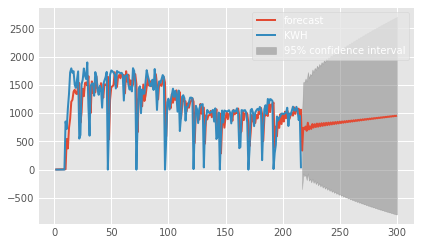

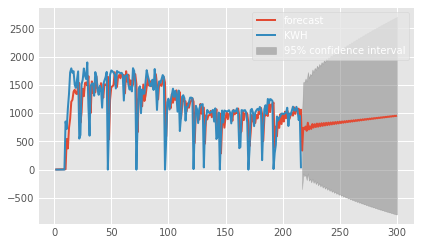

In [211]:
mod_fit.plot_predict(1,300)

mod

In [170]:
final_df['forecast_KWH'] = mod_fit.predict(start = 210, end = 216, dynamic= True)  
# final_df[['KWH', 'forecast_KWH']].plot(figsize=(12, 8)) 

In [171]:
final_df["forecast_KWH"]

2019-06-27            NaN
2019-06-28            NaN
2019-06-29            NaN
2019-07-01            NaN
2019-07-02            NaN
                       ..
2020-07-08 00:00:00   NaN
2020-07-09 00:00:00   NaN
2020-07-10 00:00:00   NaN
2020-07-11 00:00:00   NaN
2020-07-12 00:00:00   NaN
Name: forecast_KWH, Length: 306, dtype: float64

In [172]:
final_df["forecast_KWH"]

2019-06-27            NaN
2019-06-28            NaN
2019-06-29            NaN
2019-07-01            NaN
2019-07-02            NaN
                       ..
2020-07-08 00:00:00   NaN
2020-07-09 00:00:00   NaN
2020-07-10 00:00:00   NaN
2020-07-11 00:00:00   NaN
2020-07-12 00:00:00   NaN
Name: forecast_KWH, Length: 306, dtype: float64

In [173]:
df_new.index[-1]

216

In [174]:
mod_fit.predict(start=216,end=250,dynamic=True)

216    107.933782
217    -63.388391
218     36.790971
219    -40.254229
220     63.242404
221    -58.892959
222     43.441598
223    -34.716450
224     46.019206
225    -39.281230
226     39.876966
227    -33.221578
228     38.321124
229    -33.176296
230     35.982244
231    -29.765749
232     33.876403
233    -28.226212
234     31.820265
235    -25.976971
236     29.848919
237    -24.258593
238     28.095282
239    -22.461081
240     26.402251
241    -20.877101
242     24.851993
243    -19.352537
244     23.381953
245    -17.945808
246     22.020107
247    -16.621575
248     20.739794
249    -15.387406
250     19.546541
dtype: float64

In [207]:
model=sm.tsa.statespace.SARIMAX(df_new["KWH"],order=(8,1,2),seasonal_order=(1,1,1,12))
results=model.fit()

In [208]:
final_df

,KWH,forecast_KWH,index
2019-06-27,0.000,NaN,NaN
2019-06-28,0.000,NaN,NaN
2019-06-29,0.000,NaN,NaN
2019-07-01,0.219,NaN,NaN
2019-07-02,0.000,NaN,NaN
...,...,...,...
2020-07-08 00:00:00,NaN,NaN,NaN
2020-07-09 00:00:00,NaN,NaN,NaN
2020-07-10 00:00:00,NaN,NaN,NaN
2020-07-11 00:00:00,NaN,NaN,NaN


In [177]:
plt.style.use('ggplot')

In [178]:
results.predict(start=90,end=103,dynamic=True)

90     1369.739381
91     1440.675224
92     1617.478238
93     1748.938021
94     1693.142813
95     1376.962075
96     1438.914790
97     1636.866984
98     1843.784927
99     1807.503755
100    1795.585840
101    1818.981636
102    1593.753431
103    1633.454629
Name: predicted_mean, dtype: float64

In [210]:
results.predict(start=,end=300,dynamic=True)

216     915.111076
217     794.313887
218     684.195459
219     934.973737
220    1055.082622
          ...     
296    1185.466979
297    1220.920714
298    1166.681806
299    1049.196981
300    1008.500476
Name: predicted_mean, Length: 85, dtype: float64

In [222]:
future_dates

[Timestamp('2020-04-14 00:00:00'),
 Timestamp('2020-04-15 00:00:00'),
 Timestamp('2020-04-16 00:00:00'),
 Timestamp('2020-04-17 00:00:00'),
 Timestamp('2020-04-18 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-21 00:00:00'),
 Timestamp('2020-04-22 00:00:00'),
 Timestamp('2020-04-23 00:00:00'),
 Timestamp('2020-04-24 00:00:00'),
 Timestamp('2020-04-25 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-04-28 00:00:00'),
 Timestamp('2020-04-29 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-05-02 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2020-05-04 00:00:00'),
 Timestamp('2020-05-05 00:00:00'),
 Timestamp('2020-05-06 00:00:00'),
 Timestamp('2020-05-07 00:00:00'),
 Timestamp('2020-05-08 00:00:00'),
 Timestamp('2020-05-09 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-11 00:00:00'),
 Timestamp('2020-05-

<AxesSubplot:>

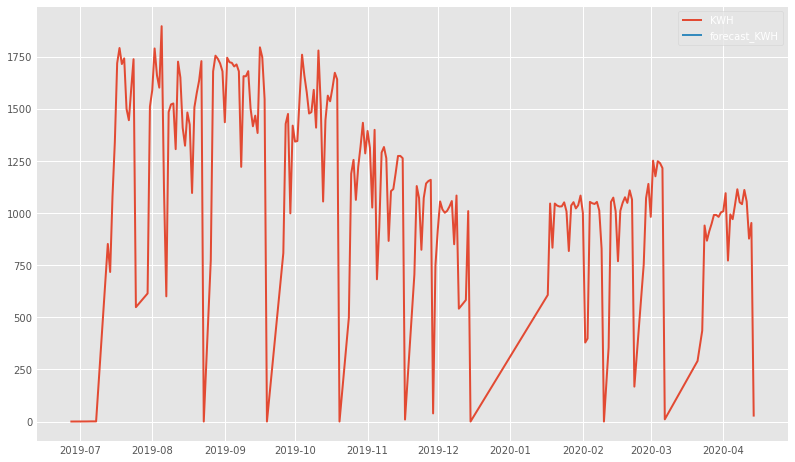

In [213]:
final_df['forecast_KWH']=results.predict(start=216,end=300,dynamic=True)
final_df[['KWH','forecast_KWH']].plot(figsize=(12,8))

In [197]:
final_df["index"]=final_df.reset_index()["index"].dt.date

<AxesSubplot:>

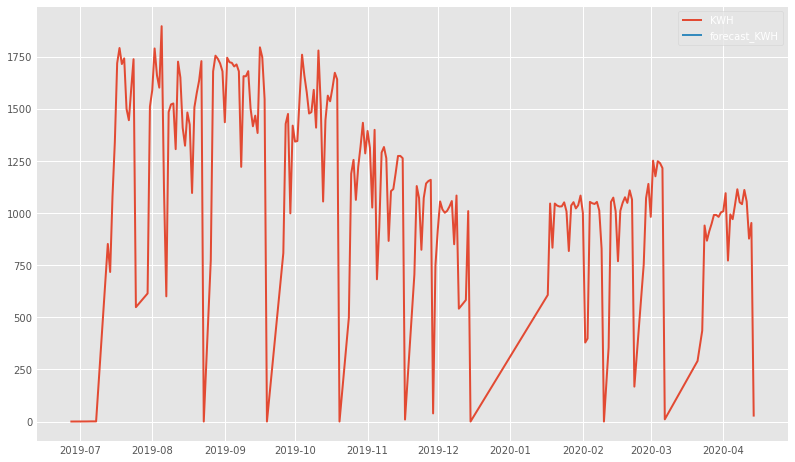

In [206]:
final_df['forecast_KWH'] = results.predict(start = 0, end = 306, dynamic= True)  
final_df[['KWH', 'forecast_KWH']].plot(figsize=(12, 8)) 

In [204]:
results.predict()

,KWH,forecast_KWH,index
2019-06-27,0.000,NaN,NaN
2019-06-28,0.000,NaN,NaN
2019-06-29,0.000,NaN,NaN
2019-07-01,0.219,NaN,NaN
2019-07-02,0.000,NaN,NaN
...,...,...,...
2020-07-08 00:00:00,NaN,NaN,NaN
2020-07-09 00:00:00,NaN,NaN,NaN
2020-07-10 00:00:00,NaN,NaN,NaN
2020-07-11 00:00:00,NaN,NaN,NaN


<AxesSubplot:>

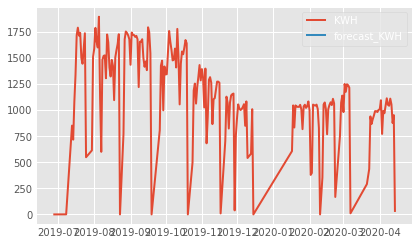

In [203]:
final_df[['KWH', 'forecast_KWH']].plot()

In [183]:
df.new

,DeviceTimeStamp,KWH
0,2019-06-27,0.000
1,2019-06-28,0.000
2,2019-06-29,0.000
3,2019-07-01,0.219
4,2019-07-02,0.000
...,...,...
212,2020-04-10,1110.400
213,2020-04-11,1054.800
214,2020-04-12,877.000
215,2020-04-13,952.100


In [187]:
results.predict(start = 217, end = 225)

217    335.181910
218    721.004606
219    700.389839
220    734.450224
221    665.554705
222    795.267949
223    682.594658
224    728.164666
225    688.481677
Name: predicted_mean, dtype: float64

In [188]:
results.predict(start = 217, end = 225, dynamic= True)  

217    335.181910
218    721.004606
219    700.389839
220    734.450224
221    665.554705
222    795.267949
223    682.594658
224    728.164666
225    688.481677
Name: predicted_mean, dtype: float64

In [160]:
[df_new_dated.index[-1]+ DateOffset(days=x)for x in range(0,90)]

[Timestamp('2020-04-14 00:00:00'),
 Timestamp('2020-04-15 00:00:00'),
 Timestamp('2020-04-16 00:00:00'),
 Timestamp('2020-04-17 00:00:00'),
 Timestamp('2020-04-18 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-21 00:00:00'),
 Timestamp('2020-04-22 00:00:00'),
 Timestamp('2020-04-23 00:00:00'),
 Timestamp('2020-04-24 00:00:00'),
 Timestamp('2020-04-25 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-04-28 00:00:00'),
 Timestamp('2020-04-29 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-05-02 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2020-05-04 00:00:00'),
 Timestamp('2020-05-05 00:00:00'),
 Timestamp('2020-05-06 00:00:00'),
 Timestamp('2020-05-07 00:00:00'),
 Timestamp('2020-05-08 00:00:00'),
 Timestamp('2020-05-09 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-11 00:00:00'),
 Timestamp('2020-05-

In [251]:
pred_df.columns=["DeviceTimeStamp","KWH","Forcasted_KWH"]
pred_df

,DeviceTimeStamp,KWH,Forcasted_KWH
0,2020-04-14,NaN,260.738647
1,2020-04-15,NaN,412.440018
2,2020-04-16,NaN,642.946127
3,2020-04-17,NaN,718.245234
4,2020-04-18,NaN,723.113895
...,...,...,...
85,2020-07-08,NaN,175.997627
86,2020-07-09,NaN,413.720237
87,2020-07-10,NaN,530.279037
88,2020-07-11,NaN,554.735672


In [250]:
df_new

,DeviceTimeStamp,KWH
0,2019-06-27,0.000
1,2019-06-28,0.000
2,2019-06-29,0.000
3,2019-07-01,0.219
4,2019-07-02,0.000
...,...,...
212,2020-04-10,1110.400
213,2020-04-11,1054.800
214,2020-04-12,877.000
215,2020-04-13,952.100


<AxesSubplot:xlabel='DeviceTimeStamp'>

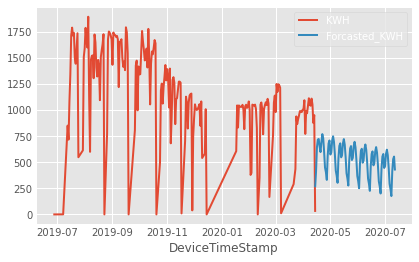

In [254]:
pd.concat([df_new.set_index("DeviceTimeStamp"),pred_df.set_index("DeviceTimeStamp")]).plot()

Thanks